In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
xy = np.load(open('PSP_DemoData1', 'rb'))
xy.shape

(180000, 2)

In [3]:
maxpoints = 30000
xy = xy[:maxpoints]
x = xy[:maxpoints, 0]
y = xy[:maxpoints, 1]

In [4]:
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=100,
    max_iter=300,
    random_state=42
)

kmeans.fit(xy)


KMeans(init='random', n_clusters=10, n_init=100, random_state=42)

In [5]:
# The lowest SSE value
print(kmeans.inertia_)


# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
kmeans.n_iter_

47561.86269791137
[[-5.29564414  2.30412406]
 [-3.02515468  0.7038142 ]
 [ 4.50296368 -3.03480697]
 [-5.20044253 -0.46395481]
 [ 2.07492888 -3.0706863 ]
 [-0.41850472 -3.10447209]
 [-4.50766314  4.76835703]
 [-1.61540166  4.98626894]
 [ 0.38517901 -0.07674672]
 [ 3.80965567  1.0010186 ]]


75

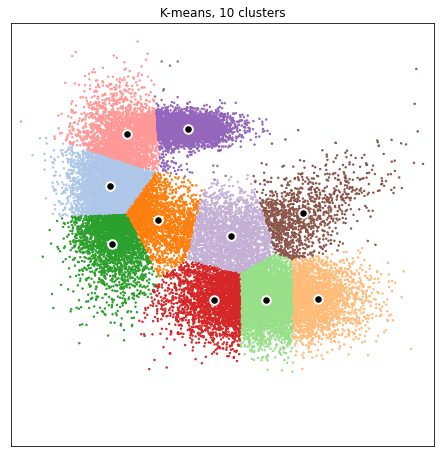

In [6]:
# Make Fig. 7

ticklabels = []
for i in range(9):
    ticklabels.append(str(i+1))
s = 2


cmap = matplotlib.cm.get_cmap('tab20')

xyp = kmeans.cluster_centers_

plt.figure(figsize=(6,6))

for i in range(10):
    
    cA = np.copy(np.array(kmeans.labels_))
    xsub = x[np.where(cA==i)]
    ysub = y[np.where(cA==i)]
    colors = np.ones(len(xsub)) + i
    plt.scatter(xsub, ysub, s=s, c=colors, cmap=cmap, vmin=0, vmax=20)
    
    plt.scatter(xyp[i, 0], xyp[i, 1], s=90, c='w')
    plt.scatter(xyp[i, 0], xyp[i, 1], s=30, c='k')
   
    rgba = cmap((i+0.5)/20)

    # plt.annotate('Class %2d   N=%3d' % ((i+1), len(x)), (-3,8), color=rgba, fontsize=18)

    
axes=plt.gca()
axes.set_aspect('equal')
    #cbar = plt.colorbar()
    #cbar.set_ticks(np.arange(0.5,20.5,1))
    #cbar.set_ticklabels(ticklabels)
plt.xticks([])
plt.yticks([])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('K-means, 10 clusters')
 
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.01)

plt.savefig("Fig7.pdf")
plt.show()
    
    